<a href="https://colab.research.google.com/github/lucasvenicius19/BeachandMountain/blob/main/BeachavsMountain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download da Pasta:

In [1]:
!git clone https://github.com/lucasvenicius19/BMDI.git

Cloning into 'BMDI'...
remote: Enumerating objects: 3457, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 3457 (delta 1), reused 6 (delta 1), pack-reused 3451
Receiving objects: 100% (3457/3457), 3.33 GiB | 25.08 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (3495/3495), done.


Importação dos pacotes

In [34]:
import pandas as pd
import numpy as np
import os
import random
import keras
import math
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
import seaborn as sns

In [3]:
input_tensor = Input(shape=(224, 224, 3))

Importando o modelo Mobilenet que foi previamente treinado no ImageNet e descartando a última camada de neurônio:

In [4]:
model=MobileNet(weights='imagenet',include_top=False)

17225924/17225924 [==============================] - 1s 0us/step


Criando a saída do modelo Mobilenet

In [5]:
x = model.output
x=GlobalAveragePooling2D()(x)

Adicionando uma camada intermediária e a camada final

In [6]:
x = Dense(50, activation='relu')(x)
preds=Dense(1, activation='sigmoid')(x)
model=Model(inputs=model.input, outputs=preds)

Visualizando todas as camadas da nova rede criada usando o modelo MobileNetV2

In [7]:
for i, layer in enumerate(model.layers):
  print(i,layer.name)

0 input_2
1 conv1
2 conv1_bn
3 conv1_relu
4 conv_dw_1
5 conv_dw_1_bn
6 conv_dw_1_relu
7 conv_pw_1
8 conv_pw_1_bn
9 conv_pw_1_relu
10 conv_pad_2
11 conv_dw_2
12 conv_dw_2_bn
13 conv_dw_2_relu
14 conv_pw_2
15 conv_pw_2_bn
16 conv_pw_2_relu
17 conv_dw_3
18 conv_dw_3_bn
19 conv_dw_3_relu
20 conv_pw_3
21 conv_pw_3_bn
22 conv_pw_3_relu
23 conv_pad_4
24 conv_dw_4
25 conv_dw_4_bn
26 conv_dw_4_relu
27 conv_pw_4
28 conv_pw_4_bn
29 conv_pw_4_relu
30 conv_dw_5
31 conv_dw_5_bn
32 conv_dw_5_relu
33 conv_pw_5
34 conv_pw_5_bn
35 conv_pw_5_relu
36 conv_pad_6
37 conv_dw_6
38 conv_dw_6_bn
39 conv_dw_6_relu
40 conv_pw_6
41 conv_pw_6_bn
42 conv_pw_6_relu
43 conv_dw_7
44 conv_dw_7_bn
45 conv_dw_7_relu
46 conv_pw_7
47 conv_pw_7_bn
48 conv_pw_7_relu
49 conv_dw_8
50 conv_dw_8_bn
51 conv_dw_8_relu
52 conv_pw_8
53 conv_pw_8_bn
54 conv_pw_8_relu
55 conv_dw_9
56 conv_dw_9_bn
57 conv_dw_9_relu
58 conv_pw_9
59 conv_pw_9_bn
60 conv_pw_9_relu
61 conv_dw_10
62 conv_dw_10_bn
63 conv_dw_10_relu
64 conv_pw_10
65 conv_pw_1

Definindo qual camada da rede será treinada. Nesse caso somente as duas últimas camadas adicionadas.

In [8]:
for layer in model.layers[:88]:
  layer.trainable=False
for layer in model.layers[88:]:
  layer.trainable=True

Definindo o tamanho de cada batch:

In [9]:
batch_size = 32

Cada imagem do banco será apresentada a rede de uma forma diferente através do ImageDataGenerator:

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.4,
    zoom_range=0.4,
    height_shift_range=0.3,
    width_shift_range=0.3,
    rotation_range=50,
    horizontal_flip=True
)

In [11]:
test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [12]:
training_set = train_datagen.flow_from_directory(
    #'/content/drive/MyDrive/imagens/training_set',
    '/content/BMDI/training_set',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

Found 2795 images belonging to 2 classes.


In [13]:
test_set = test_datagen.flow_from_directory(
    #'/content/drive/MyDrive/imagens/validation_set',
    '/content/BMDI/validation_set',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

Found 600 images belonging to 2 classes.


Definindo os padrões de composição de rede:

In [14]:
model.compile(optimizer=Adam(learning_rate=0.0001), run_eagerly=True, loss='binary_crossentropy', metrics=['accuracy'])

Fazendo o treinamento da rede:

In [15]:
history = model.fit(
    x=training_set,
    steps_per_epoch = 2795//batch_size,
    epochs=50,
    validation_data = test_set,
    validation_steps = 600//batch_size
)

Epoch 1/50
87/87 [==============================] - 739s 8s/step - loss: 0.7610 - accuracy: 0.4980 - val_loss: 0.7312 - val_accuracy: 0.5521
Epoch 2/50
87/87 [==============================] - 718s 8s/step - loss: 0.7525 - accuracy: 0.5071 - val_loss: 0.7292 - val_accuracy: 0.5538
Epoch 3/50
87/87 [==============================] - 735s 8s/step - loss: 0.7418 - accuracy: 0.5114 - val_loss: 0.7221 - val_accuracy: 0.5712
Epoch 4/50
87/87 [==============================] - 716s 8s/step - loss: 0.7308 - accuracy: 0.5252 - val_loss: 0.7228 - val_accuracy: 0.5608
Epoch 5/50
87/87 [==============================] - 721s 8s/step - loss: 0.7470 - accuracy: 0.5100 - val_loss: 0.7138 - val_accuracy: 0.5677
Epoch 6/50
87/87 [==============================] - 734s 8s/step - loss: 0.7381 - accuracy: 0.5092 - val_loss: 0.7144 - val_accuracy: 0.5729
Epoch 7/50
87/87 [==============================] - 727s 8s/step - loss: 0.7279 - accuracy: 0.5335 - val_loss: 0.7052 - val_accuracy: 0.5799
Epoch 8/50
87

Salvando o modelo para utilização futura

In [16]:
model.save('dataset-images_mobilenet.h5')
from google.colab import files
files.download('dataset-images_mobilenet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mostrando os arquivos da pasta single_prediction com imagens inéditas para a rede classificar:

In [17]:
!ls '/content/BMDI/single_prediction'

montanha101.jpg  montanha30.jpg   montanha465.jpg  praia136.jpg  praia292.jpg  praia440.jpg
montanha107.jpg  montanha324.jpg  montanha476.jpg  praia138.jpg  praia302.jpg  praia441.jpg
montanha113.jpg  montanha326.jpg  montanha49.jpg   praia146.jpg  praia32.jpg   praia442.jpg
montanha120.jpg  montanha32.jpg   montanha50.jpg   praia151.jpg  praia33.jpg   praia450.jpg
montanha129.jpg  montanha35.jpg   montanha56.jpg   praia164.jpg  praia350.jpg  praia454.jpg
montanha130.jpg  montanha375.jpg  montanha57.jpg   praia203.jpg  praia351.jpg  praia455.jpg
montanha138.jpg  montanha382.jpg  montanha58.jpg   praia20.jpg	 praia358.jpg  praia459.jpg
montanha14.jpg	 montanha393.jpg  montanha5.jpg    praia211.jpg  praia366.jpg  praia464.jpg
montanha15.jpg	 montanha400.jpg  montanha61.jpg   praia21.jpg	 praia371.jpg  praia471.jpg
montanha17.jpg	 montanha407.jpg  montanha64.jpg   praia222.jpg  praia376.jpg  praia55.jpg
montanha20.jpg	 montanha413.jpg  montanha77.jpg   praia227.jpg  praia384.jpg  praia60.

In [67]:
filenames = os.listdir(
    "/content/BMDI/single_prediction"
    )
filename = random.choice(filenames)
img_path = os.path.join(
    "/content/BMDI/single_prediction",
    filename
    )
print(img_path)

/content/BMDI/single_prediction/praia366.jpg


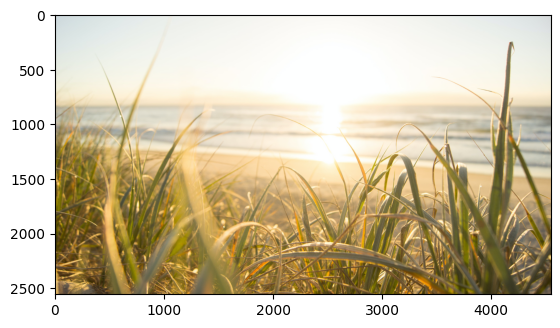

In [68]:
test_image = image.load_img(img_path, target_size = (224, 224))

img = mpimg.imread(img_path)
plt.imshow(img)
plt.show()

In [69]:
test_image = (image.img_to_array(test_image) / 255.0)
test_image = np.expand_dims(test_image, axis=0)

In [70]:
result = model.predict(test_image)

if result[0][0] > 0.5:
  prediction = 'beach'
else:
  prediction = 'mountain'
print(result)
print(prediction)

1/1 [==============================] - 0s 137ms/step
[[0.5149291]]
beach


In [31]:
previsoes = model.predict(test_set) #x_teste

predicted_labels = (previsoes > 0.5).astype(int) #previsoes

true_labels = test_set.classes #y_teste

matriz_confusao = confusion_matrix(true_labels, predicted_labels)
print(matriz_confusao)

19/19 [==============================] - 65s 3s/step
[[165 135]
 [182 118]]


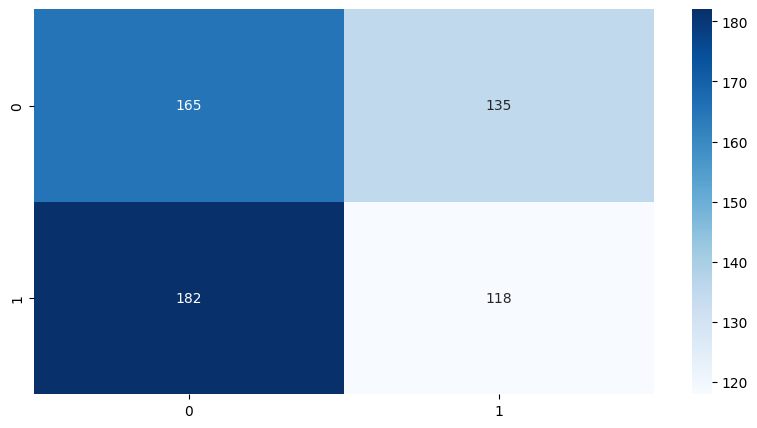

In [32]:
plt.figure(figsize=(10, 5))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues")
plt.show()

In [35]:
report  = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.48      0.55      0.51       300
           1       0.47      0.39      0.43       300

    accuracy                           0.47       600
   macro avg       0.47      0.47      0.47       600
weighted avg       0.47      0.47      0.47       600

